In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
import cv2
import imghdr

In [11]:
data_dirs = ['/content/drive/MyDrive/data/flooding', '/content/drive/MyDrive/data/normal']

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [15]:
for data_dir in data_dirs:
    for item in os.listdir(data_dir):
        item_path = os.path.join(data_dir, item)
        if os.path.isfile(item_path):
            try:
                img = cv2.imread(item_path)
                tip = imghdr.what(item_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(item_path))
                    os.remove(item_path)
            except Exception as e:
                print('Issue with image {}'.format(item_path))
        else:
            print('{} is not a file.'.format(item_path))


In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data')

Found 106 files belonging to 5 classes.


In [19]:
data_iterator = data.as_numpy_iterator()

In [20]:
batch = data_iterator.next()

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          ...,
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177]],
 
         [[0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          ...,
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177]],
 
         [[0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          ...,
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177],
          [0.91764706, 0.93333334, 0.92941177]],
 
         ...,
 
         [[0.3700291 , 0.37157628, 0.14887407],
          [0.35604

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(hist.history['accuracy'], color='teal', label='accuracy')
ax.plot(hist.history['loss'], color='orange', label='loss')

ax.set_title('Performance', fontsize=20)
ax.legend(loc='upper left')

plt.show()

In [35]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pr.update_state(y, yhat)
    re.update_state(y, yhat)
    ac.update_state(y, yhat)

**Testing**(1)

In [36]:
import cv2

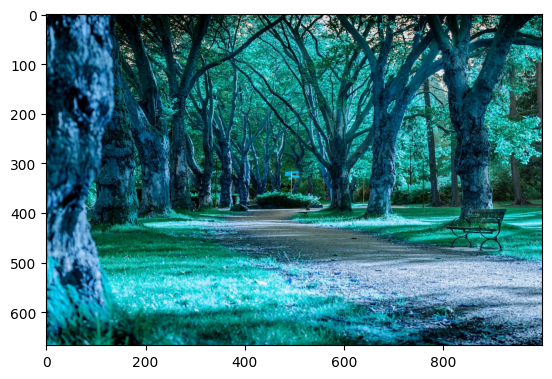

In [37]:
img = cv2.imread('/content/drive/MyDrive/data/test1.jpeg')
if img is None:
    print("Image not loaded. Check the file path and image format.")
else:
    plt.imshow(img)
    plt.show()

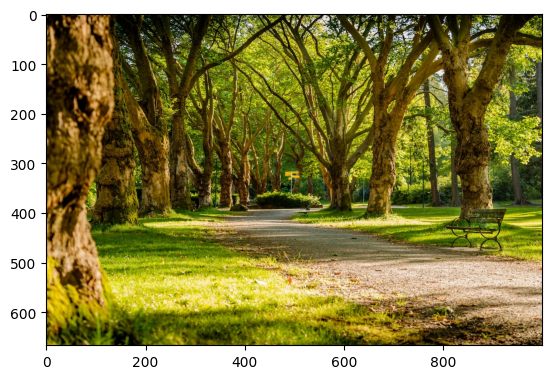

In [38]:
img = cv2.imread('/content/drive/MyDrive/data/test1.jpeg')
if img is None:
    print("Image not loaded. Check the file path and image format.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

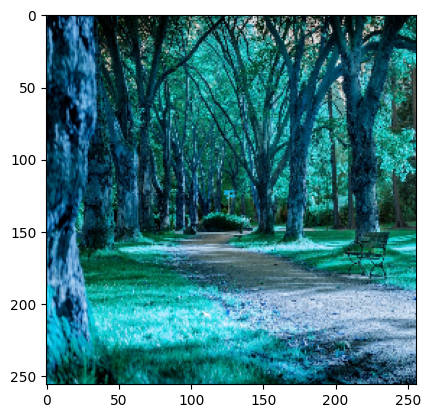

In [39]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [40]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 167ms/step


In [41]:
yhat

array([[1.]], dtype=float32)

In [42]:
if yhat > 0.5:
    print(f'Predicted class is normal')
else:
    print(f'Predicted class is flooded')

Predicted class is normal


**Testing**(2)

In [43]:
import cv2

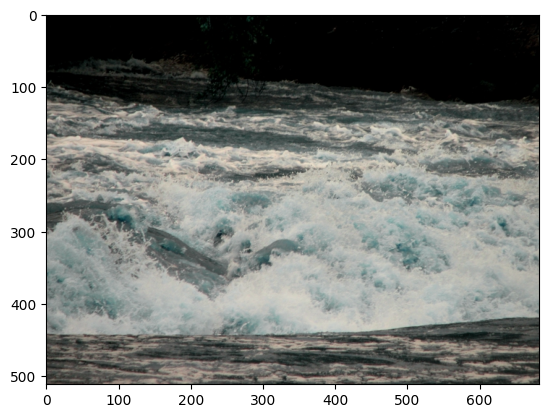

In [44]:
img = cv2.imread('/content/drive/MyDrive/data/test2.jpg')
if img is None:
    print("Image not loaded. Check the file path and image format.")
else:
    plt.imshow(img)
    plt.show()

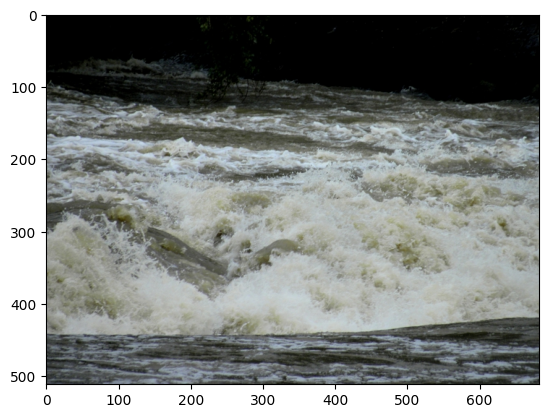

In [45]:
img = cv2.imread('/content/drive/MyDrive/data/test2.jpg')
if img is None:
    print("Image not loaded. Check the file path and image format.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

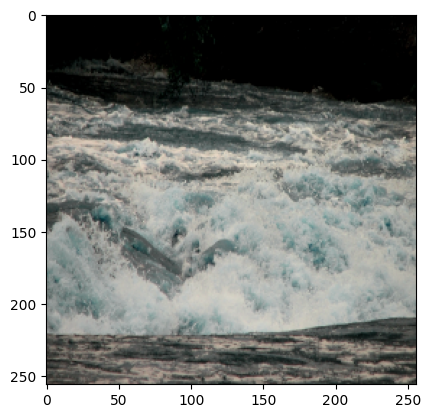

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 61ms/step


In [48]:
yhat

array([[1.]], dtype=float32)

In [49]:
if yhat > 0.5:
    print(f'Predicted class is normal')
else:
    print(f'Predicted class is flooded')

Predicted class is normal


Saving the processed image into respective folders

In [50]:
import cv2
import os
import shutil

img_path = '/content/drive/MyDrive/data/test2.jpg'
prediction_threshold = 0.5

img = cv2.imread(img_path)

if img is None:
    print("Image not loaded. Check the file path and image format.")
else:
    resize = tf.image.resize(img, (256, 256))
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    if yhat > prediction_threshold:
        predicted_class = 'normalop'
    else:
        predicted_class = 'floodedop'

    output_dir = os.path.join('/content/drive/MyDrive/data', predicted_class)
    os.makedirs(output_dir, exist_ok=True)

    output_img_path = os.path.join(output_dir, os.path.basename(img_path))
    shutil.copy(img_path, output_img_path)

    print(f'Predicted class is {predicted_class}')
    print(f'Saved image to {output_img_path}')


1/1 [==============================] - 0s 35ms/step
Predicted class is normalop
Saved image to /content/drive/MyDrive/data/normalop/test2.jpg


In [51]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


OSError: ignored

In [ ]:
import os
import PIL.Image
import PIL.ExifTags
from gmplot import gmplot
from geopy.geocoders import Nominatim
import webbrowser
import cv2
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
from matplotlib import pyplot as plt

def classify_and_save_image(img_path, model):
    prediction_threshold = 0.5

    img = cv2.imread(img_path)

    if img is None:
        print("Image not loaded. Check the file path and image format.")
        return

    resize = tf.image.resize(img, (256, 256))
    yhat = model.predict(np.expand_dims(resize / 255, 0))

    if yhat < prediction_threshold:
        predicted_class = 'normalop'
    else:
        predicted_class = 'floodedop'

    output_dir = os.path.join('/content/drive/MyDrive/data', predicted_class)
    os.makedirs(output_dir, exist_ok=True)

    output_img_path = os.path.join(output_dir, os.path.basename(img_path))
    shutil.copy(img_path, output_img_path)

    print(f'Predicted class is {predicted_class}')
    print(f'Saved image to {output_img_path}')

model = Sequential()
model.add(Conv2D(16, (3, 3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/models/imageclassifier.h5')

image_folder = '/content/drive/MyDrive/'

for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(image_folder, filename)

        classify_and_save_image(image_path, model)

gmap = gmplot.GoogleMapPlotter(0, 0, 10)
geoLoc = Nominatim(user_agent="GetLoc")

for filename in os.listdir(image_folder):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        image_path = os.path.join(image_folder, filename)

        img = PIL.Image.open(image_path)

        exif = {}
        exif_info = img._getexif()

        if exif_info:
            exif = {
                PIL.ExifTags.TAGS[k]: v
                for k, v in exif_info.items()
                if k in PIL.ExifTags.TAGS
            }

        if 'GPSInfo' in exif:
            north = exif['GPSInfo'][2]
            east = exif['GPSInfo'][4]
            lat = ((((north[0] * 60) + north[1]) * 60) + north[2]) / 60 / 60
            long = ((((east[0] * 60) + east[1]) * 60) + east[2]) / 60 / 60
            lat, long = float(lat), float(long)

            locname = geoLoc.reverse(f"{lat},{long}")

            locname_address_encoded = locname.address.encode('utf-8', 'ignore')

            gmap.marker(lat, long, "cornflowerblue", title=locname_address_encoded)

with open("location.html", "w", encoding="utf-8") as html_file:
    html_file.write(gmap.get())

webbrowser.open("location.html", new=2)


In [ ]:
!pip install gmplot